In [10]:
import tensorflow as tf, numpy as np, pandas as pd, torch

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true-y_pred) / y_true)) * 100.0

In [12]:
df = pd.read_feather('E:/Skóli/HÍ/Vélaverkfræði Master HÍ/Lokaverkefni/Data/merged-full-25ms-24hr-28-2-24.feather')
df = df[df.f < df.fg]
df = df.dropna()
df['gust_factor'] = df.fg / df.f
df = df.drop(['f', 'fg', 'fsdev', 'd', 'dsdev', 'longitude', 'latitude', 'X', 'Y', 'time', 'stod'], axis = 1)

In [13]:
y = df.gust_factor
X = df.drop(['gust_factor'], axis = 1)

X = X.drop(['ws_15', 'ws_250', 'ws_500', 'wd_15', 'wd_250', 'wd_500', 'p_15', 'p_250', 'p_500', 't_15', 't_250', 't_500', 'N_01', 'N_12'], axis = 1)

columns = X.columns

# Changing the type of X,y so as to work with Tensorflow
X, y = X.values.astype(np.float32), y.values.astype(np.float32)

scaler = StandardScaler()

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)


train = pd.DataFrame(X_train, columns = columns)
train['gust_factor'] = y_train

validate = pd.DataFrame(X_val, columns = columns)
validate['gust_factor'] = y_val

test = pd.DataFrame(X_test, columns = columns)
test['gust_factor'] = y_test

In [14]:
columns

Index(['Ri_01', 'Ri_12'], dtype='object')

In [15]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import NodeConfig, DANetConfig, DANetModel, NODEModel
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
    ExperimentConfig,
)

data_config = DataConfig(
    target=["gust_factor"],
    continuous_cols=list(columns),  # List of continuous feature column names
    categorical_cols=[]#["cat_feature1", "cat_feature2", ...],  # List of categorical feature column names
)

model_config = NodeConfig(
    task="regression",  # or "classification" for classification tasks
    num_trees = 5,
    num_layers = 3,
    depth = 5,
)

optimizer_config = OptimizerConfig()

trainer_config = TrainerConfig(max_epochs=20)#, gradient_clip_val=10, fast_dev_run = False)

In [16]:

node_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2024-03-08 13:01:29,129 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

In [17]:
node_model.fit(train=train, validation=validate)

Seed set to 42


2024-03-08 13:01:29,218 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-03-08 13:01:29,223 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-03-08 13:01:29,247 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: NODEModel

c:\Users\Brynjar Geir\Documents\lokaverkefni_vel\lokaverkefni_vel\code\.venv\Lib\site-packages\pytorch_tabular\models\node\node_model.py:110: UserWarning: Ignoring head config because NODE has a specific head which subsets the tree outputs
  warnings.warn("Ignoring head config because NODE has a specific head which subsets the tree outputs")


2024-03-08 13:01:29,277 - {pytorch_tabular.models.node.node_model:73} - INFO - Data Aware Initialization of NODE   
using a forward pass with 2000 batch size....

2024-03-08 13:01:29,362 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-03-08 13:01:29,405 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

c:\Users\Brynjar Geir\Documents\lokaverkefni_vel\lokaverkefni_vel\code\.venv\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory C:\Users\Brynjar Geir\Documents\lokaverkefni_vel\lokaverkefni_vel\code\model\saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone     │  4.7 K │
│ 1 │ _embedding_layer │ Embedding1dLayer │      4 │
│ 2 │ _head            │ Lambda           │      0 │
│ 3 │ loss             │ MSELoss          │      0 │
└───┴──────────────────┴──────────────────┴────────┘

Trainable params: 3.7 K                                                                                            
Non-trainable params: 963                                                                                          
Total params: 4.7 K                                                                                                
Total estimated model params size (MB): 0

Output()

c:\Users\Brynjar 
Geir\Documents\lokaverkefni_vel\lokaverkefni_vel\code\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\
data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

c:\Users\Brynjar 
Geir\Documents\lokaverkefni_vel\lokaverkefni_vel\code\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\
data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.

2024-03-08 13:03:32,145 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-03-08 13:03:32,147 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

In [18]:
result = node_model.evaluate(test)
y_pred = node_model.predict(test)

node_model.save_model("./saved_models/node_model")


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.12422828376293182    │
│  test_mean_squared_error  │    0.12422828376293182    │
└───────────────────────────┴───────────────────────────┘

In [19]:
mape = mean_absolute_percentage_error(y_test, y_pred.to_numpy())
print(f"The MAPE is {mape}")

The MAPE is 9.24130630493164


In [20]:
X_shapley = pd.DataFrame(X, columns = columns)

X_shapley

,Ri_01,Ri_12
0,-0.593939,-1.137324
1,-0.422328,-1.799695
2,-1.177507,26685.779297
3,-2.864259,233.822189
4,0.412797,245.814621
...,...,...
11274,-7.538465,4.194781
11275,-0.042580,1.078334
11276,-0.110178,12.661773
11277,-0.264139,1.104732


In [21]:
import shap

background_data = shap.maskers.Independent(X_shapley)

explainer = shap.Explainer(node_model.predict, background_data)

#shap_values = explainer.shap_values(X_shapley[:100])

shap_values = explainer(X_shapley[:1000])

ExactExplainer explainer: 1001it [01:36,  9.77it/s]                          


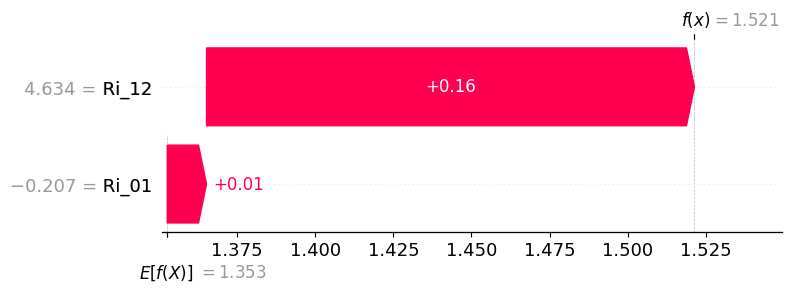

In [22]:
shap.plots.waterfall(shap_values[50])


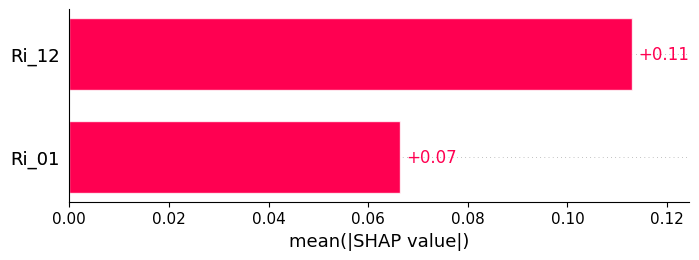

In [23]:
shap.plots.bar(shap_values)